# Tiltrotor UAV Simulation - Modular Demo

This notebook demonstrates the modular tiltrotor UAV simulation framework with PyBullet integration.

## Features
- **Modular architecture**: Separate modules for dynamics, control, navigation, physics, and visualization
- **PyBullet integration**: Advanced physics simulation with realistic rendering
- **H-infinity control**: Robust controller with disturbance rejection
- **Waypoint navigation**: Automatic waypoint following with obstacle avoidance
- **State estimation**: Kalman filtering for sensor fusion

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tiltrotor_sim.models import TiltRotorUAVParameters, TiltRotorUAV
from tiltrotor_sim.navigation import SphereObstacle, BoxObstacle
from tiltrotor_sim.utils import SimulationRunner
from tiltrotor_sim.visualization import SimulationPlotter

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Modules loaded successfully!")

Modules loaded successfully!


## 1. Define UAV Parameters

In [11]:
# Create UAV with physical parameters
params = TiltRotorUAVParameters()
uav = TiltRotorUAV(params)

print(f"UAV Parameters:")
print(f"  Mass: {params.m} kg")
print(f"  Arm length: {params.l} m")
print(f"  Hover thrust: {params.get_total_hover_thrust():.2f} N")
print(f"  Inertia: Ix={params.Ix:.4f}, Iy={params.Iy:.4f}, Iz={params.Iz:.4f} kg⋅m²")

UAV Parameters:
  Mass: 2.0 kg
  Arm length: 0.25 m
  Hover thrust: 19.62 N
  Inertia: Ix=0.0348, Iy=0.0459, Iz=0.0977 kg⋅m²


## 2. Define Mission: Waypoints and Obstacles

In [12]:
# Define waypoints
waypoints = [
    np.array([2.0, 2.0, 7.0]),
    np.array([7.0, 7.0, 7.0]),
    np.array([15.0, 8.0, 6.0]),
    np.array([20.0, 10.0, 6.0])
]

# Define obstacles
obstacles = [
    SphereObstacle(center=np.array([5.0, 5.0, 3.0]), radius=1.5),
    BoxObstacle(min_corner=np.array([2.0, 2.0, 2.0]), 
                max_corner=np.array([9.0, 4.0, 5.0]))
]

print(f"Mission Setup:")
print(f"  {len(waypoints)} waypoints")
print(f"  {len(obstacles)} obstacles")
for i, wp in enumerate(waypoints):
    print(f"  WP{i+1}: ({wp[0]:.1f}, {wp[1]:.1f}, {wp[2]:.1f})")

Mission Setup:
  4 waypoints
  2 obstacles
  WP1: (2.0, 2.0, 7.0)
  WP2: (7.0, 7.0, 7.0)
  WP3: (15.0, 8.0, 6.0)
  WP4: (20.0, 10.0, 6.0)


## 3. Run Simulation (Simple Physics)

First, we'll run with the simple Euler integrator for fast computation.

In [13]:
# Initial state: [x, ẋ, y, ẏ, z, ż, φ, φ̇, θ, θ̇, ψ, ψ̇]
x0 = np.array([0.5, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# Create simulation runner (simple physics)
runner = SimulationRunner(
    uav=uav,
    waypoints=waypoints,
    obstacles=obstacles,
    dt=0.01,
    use_pybullet=False,  # Use simple integrator
    controller_params={'r': 5.0, 'rho': 0.5}
)

# Run simulation
t, states, states_est, controls, references, wp_indices, collision_flags, state_history = runner.run(
    x0=x0,
    t_final=100.0
)

print("\nSimulation completed!")
print(f"Total time: {t[-1]:.2f}s")
print(f"Final position: ({states[-1, 0]:.2f}, {states[-1, 2]:.2f}, {states[-1, 4]:.2f})")

TILTROTOR UAV SIMULATION
Simulator: Simple
Timestep: 0.01s
Duration: 100.0s
Waypoints: 4
Obstacles: 2

  t=0.0s: AVOID_OBSTACLE, WP1, z=1.00, z_des=7.00
  t=0.5s: AVOID_OBSTACLE, WP1, z=1.02, z_des=7.00
  t=1.0s: AVOID_OBSTACLE, WP1, z=1.06, z_des=7.00
  t=1.5s: AVOID_OBSTACLE, WP1, z=1.15, z_des=7.00
  t=2.0s: AVOID_OBSTACLE, WP1, z=1.27, z_des=7.00
  t=2.5s: AVOID_OBSTACLE, WP1, z=1.43, z_des=7.00
  t=3.0s: AVOID_OBSTACLE, WP1, z=1.62, z_des=7.00
  t=3.5s: AVOID_OBSTACLE, WP1, z=1.85, z_des=7.00
  t=4.0s: AVOID_OBSTACLE, WP1, z=2.09, z_des=7.00
  t=4.5s: AVOID_OBSTACLE, WP1, z=2.37, z_des=7.00
  t=5.0s: AVOID_OBSTACLE, WP1, z=2.66, z_des=7.00
  t=5.5s: AVOID_OBSTACLE, WP1, z=2.97, z_des=7.00
  t=6.0s: AVOID_OBSTACLE, WP1, z=3.30, z_des=7.00
  t=6.5s: AVOID_OBSTACLE, WP1, z=3.65, z_des=7.00
  t=7.0s: AVOID_OBSTACLE, WP1, z=4.00, z_des=7.00
  t=7.5s: AVOID_OBSTACLE, WP1, z=4.37, z_des=7.00
  t=8.0s: AVOID_OBSTACLE, WP1, z=4.74, z_des=7.00
  t=8.5s: AVOID_OBSTACLE, WP1, z=5.12, z_des=7.

## 4. Visualize Results

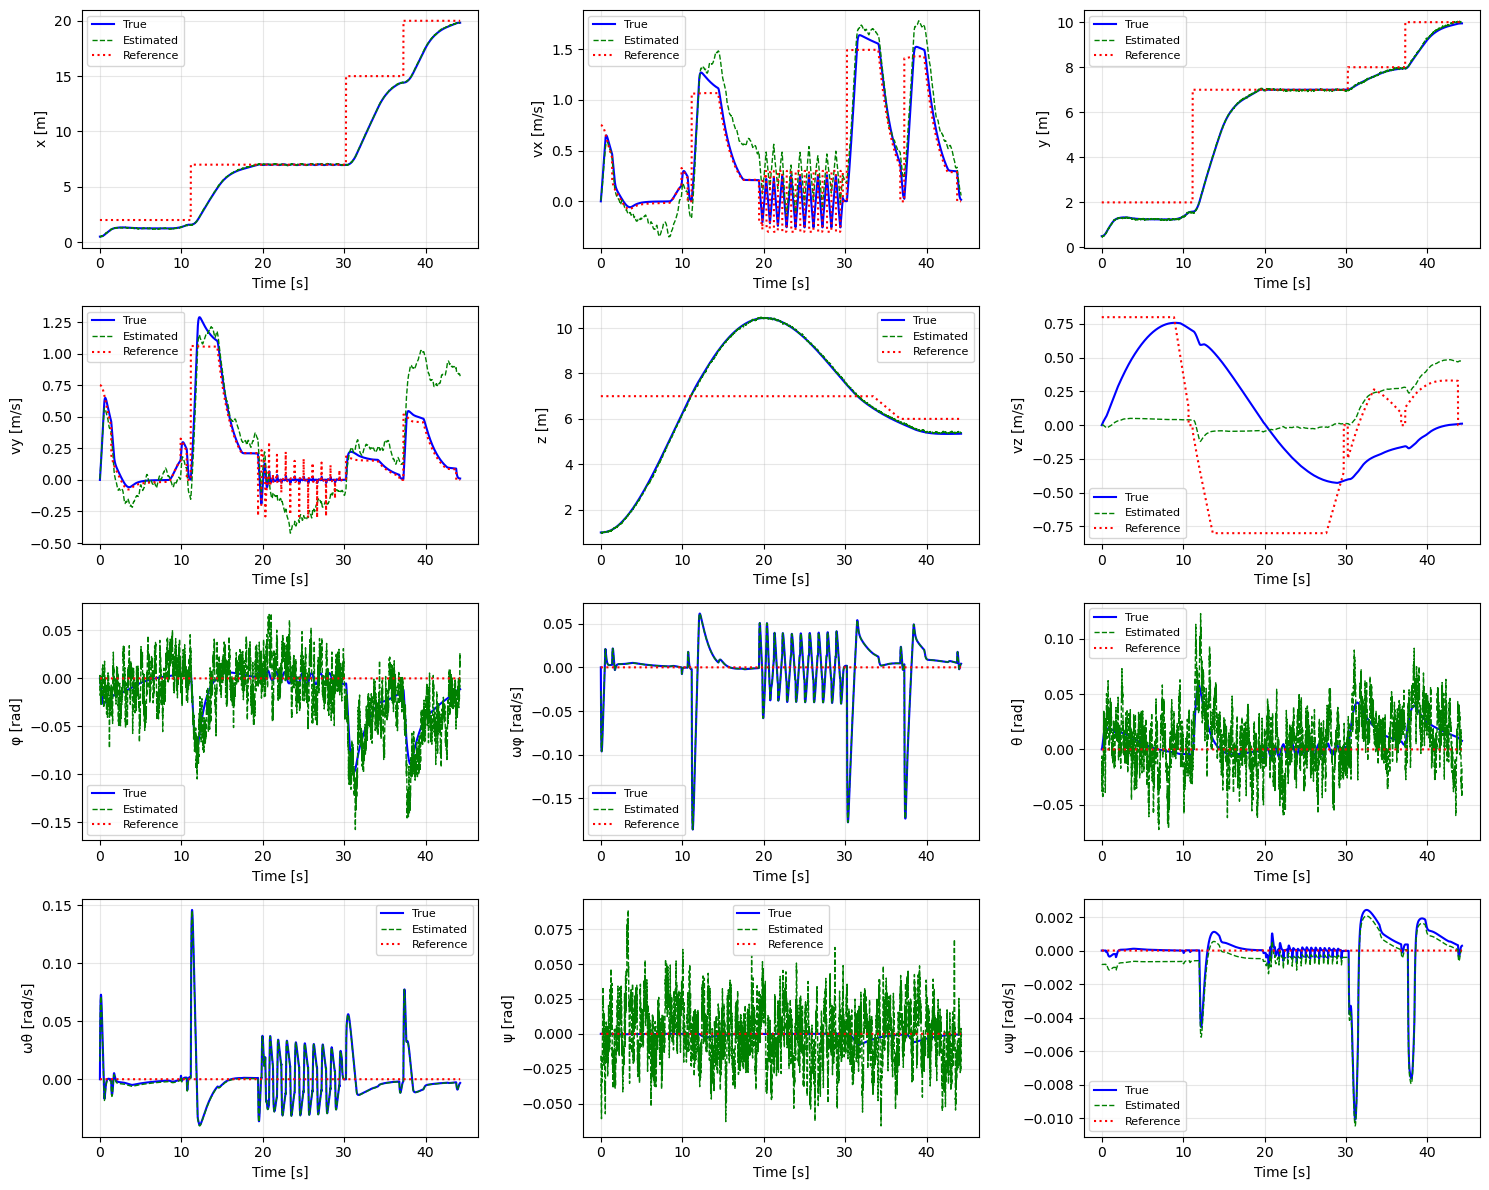

In [14]:
# Plot state trajectories
SimulationPlotter.plot_states(
    t, states, states_est, references,
    save_path='results_states_simple.png'
)

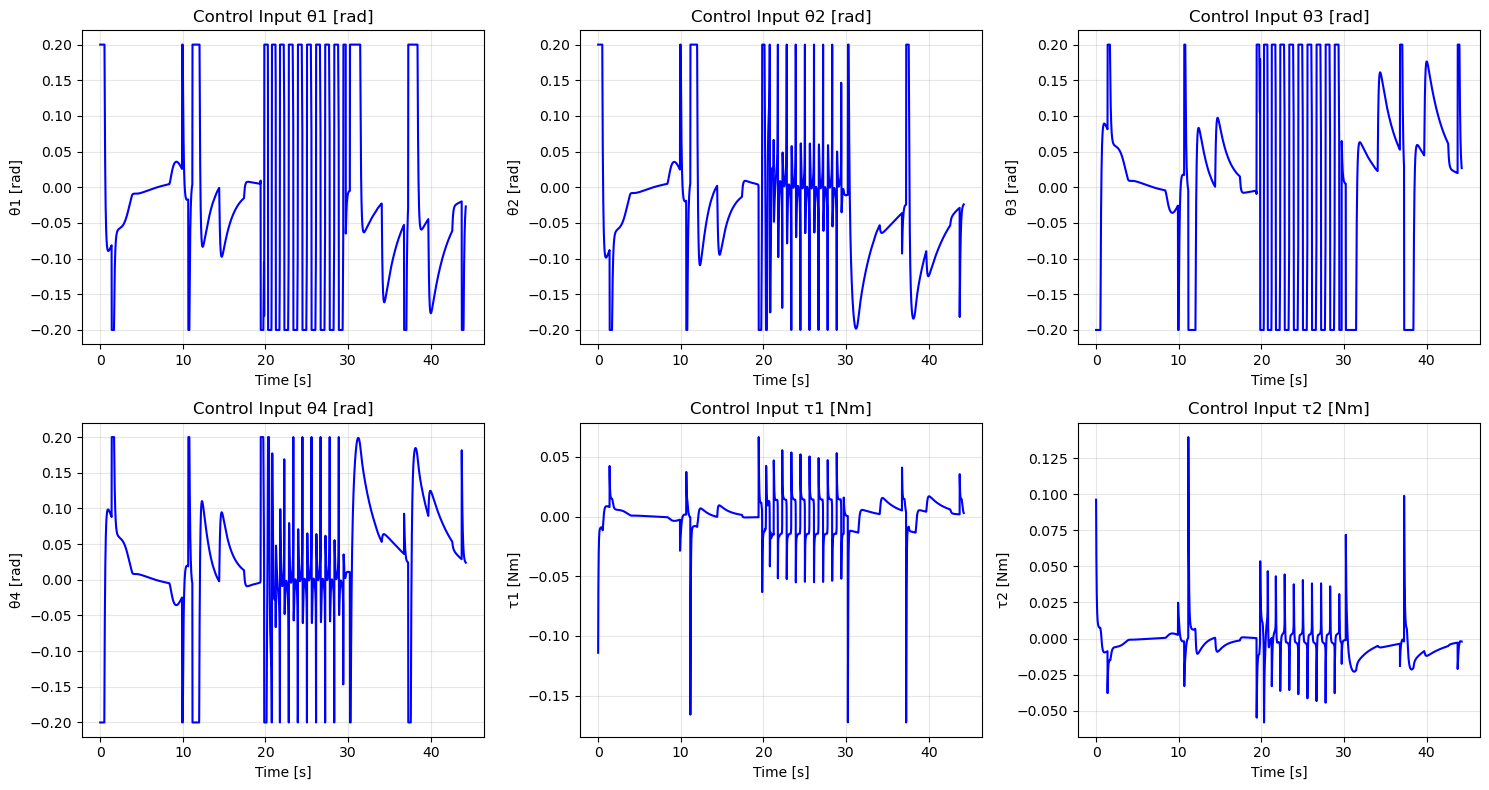

In [15]:
# Plot control inputs
SimulationPlotter.plot_controls(
    t, controls,
    save_path='results_controls_simple.png'
)

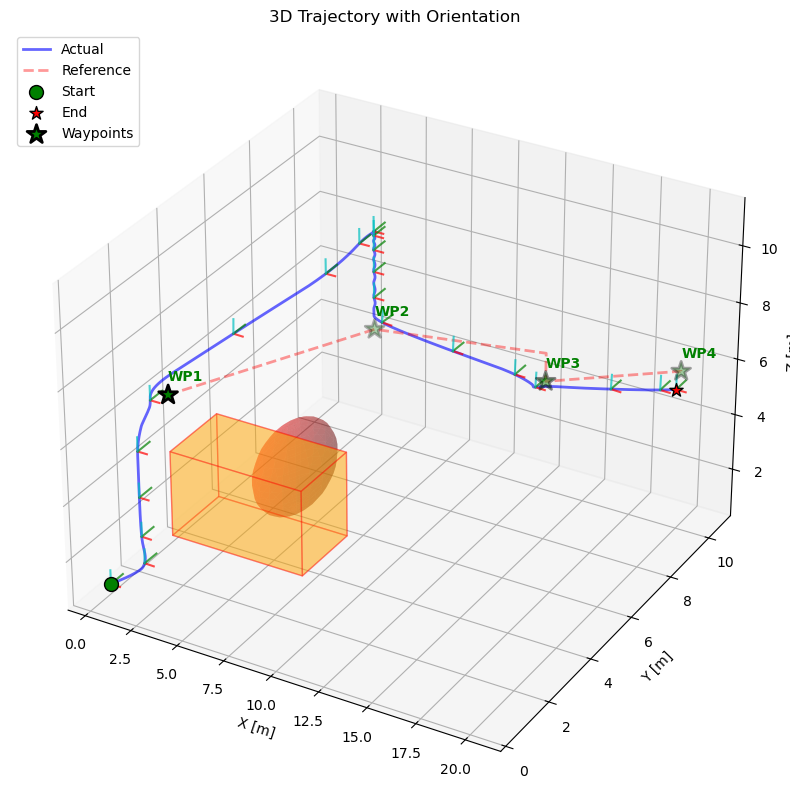

In [16]:
# Plot 3D trajectory with obstacles and waypoints
SimulationPlotter.plot_3d_trajectory(
    states, references, waypoints, obstacles,
    save_path='results_3d_simple.png'
)

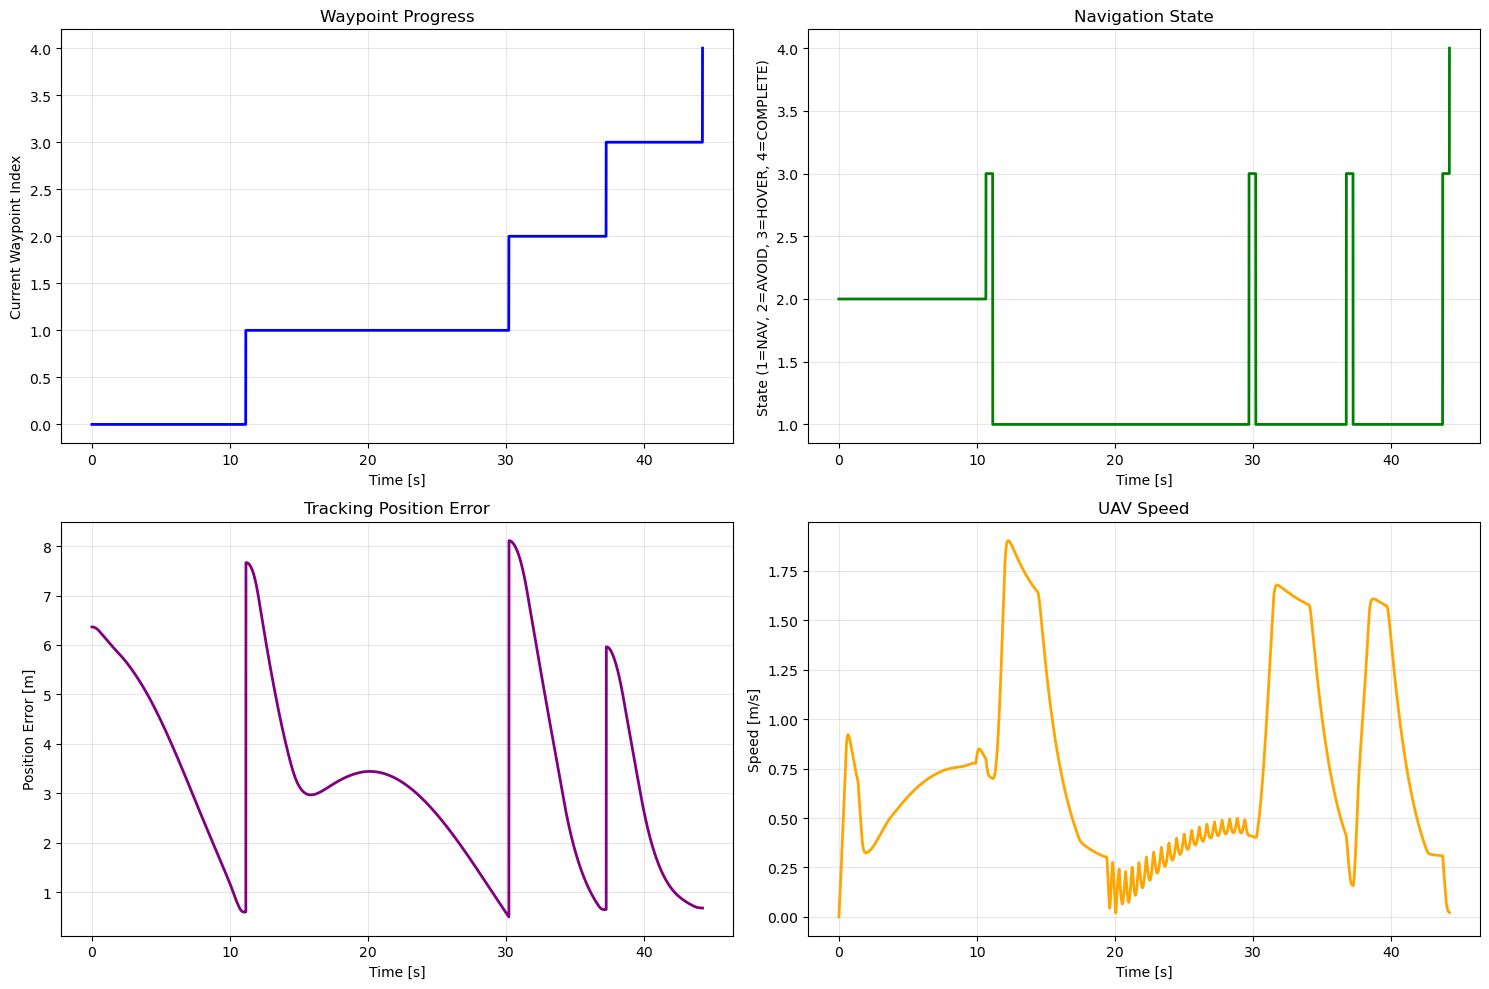

In [17]:
# Plot mission summary
SimulationPlotter.plot_mission_summary(
    t, states, references, wp_indices, collision_flags, state_history,
    save_path='results_summary_simple.png'
)

## 5. Performance Analysis

In [9]:
# Calculate performance metrics
position_error = np.linalg.norm(states[:, [0, 2, 4]] - references[:, [0, 2, 4]], axis=1)
mean_error = np.mean(position_error)
max_error = np.max(position_error)

velocity = np.linalg.norm(states[:, [1, 3, 5]], axis=1)
max_velocity = np.max(velocity)

control_effort = np.mean(np.abs(controls))

num_collisions = np.sum(collision_flags)

print("Performance Metrics:")
print(f"  Mean position error: {mean_error:.3f} m")
print(f"  Max position error: {max_error:.3f} m")
print(f"  Max velocity: {max_velocity:.3f} m/s")
print(f"  Average control effort: {control_effort:.4f}")
print(f"  Collisions: {int(num_collisions)}")
print(f"  Mission time: {t[-1]:.2f} s")

Performance Metrics:
  Mean position error: 3.371 m
  Max position error: 8.110 m
  Max velocity: 1.903 m/s
  Average control effort: 0.0555
  Collisions: 0
  Mission time: 44.24 s


## Summary

This notebook demonstrated:
1. **Modular architecture**: Clean separation of concerns
2. **Flexible physics**: Switch between simple and PyBullet physics
3. **Robust control**: H-infinity controller with Kalman filtering
4. **Autonomous navigation**: Waypoint following with obstacle avoidance
5. **Comprehensive visualization**: Multiple plotting functions for analysis

### Next Steps
- Tune controller parameters (`r`, `rho`)
- Experiment with different waypoint configurations
- Add more complex obstacles
- Implement disturbance rejection tests
- Try different control strategies